In [1]:
import re

In [10]:
string = "tiger is the national animal of India"
pattern = "tiger"

mo = re.match(pattern, string)
mo

<re.Match object; span=(0, 5), match='tiger'>

In [13]:
#match only search in the starting of the sting. If there is a value in middle of the string, you have to use search

pattern2 = "national"
mot = re.search(pattern2, string)
print(mot)

#to see what is in the mot, you can use group(0)

print(mot.group(0))

<re.Match object; span=(13, 21), match='national'>
national


In [18]:
string2 = "tiger is the national animal of India and lotus is national flower" 
pattern3 = "national"
momo = re.findall(pattern3, string2)
print(momo)

['national', 'national']


In [20]:
#if we want to know the index/place of each occurance, we use finditer

momo = re.finditer(pattern3, string2)
for m in momo:
    print(m.start())

13
51


# Text Preprocessing

## Corpus
Corpus -> Collection of text docs (collection of tweets, documents)
Corpus > documents > Paragraph > Sentences > Tokens

*Tokens*: Smaller units of text (word, phrases, ngrams)

*Ngrams*: combination of N words/ Characters together (useful in text classification task)

Sentence: I love my phone

Unigram (n=1) - I, Love, my, phone
Bigrams(n=2) - I love, love my, my phone
Trigrams(n=3) - I love my, love my phone

## Tokenization

- process of splitting a text obj into smaller units (tokens)
- Smaller Units: words, numbers, symbols, ngrams, Characters
Techniques:
- White space tokenizer / Unigram tokenizer
- Regular exp tokenizer
Eg: "Football,Cricket;Golf Tennis"
re.split(r'[;,\s]', line)
Tokens: Football, Cricket, Golf, Tennis

## Normalization
Morpheme: base form of a word
Structure od token: <prefix><Morpheme><suffix>
    eg: Anitnationalist: Anti + national + ist

So, Normalization is process of converting a token into its base form (morpheme)

This helps reducting data dimentionality, removing duplicate, dec no. of unique values.

Techniques: Stemming and Lemmatization

### Stemming
Elementary rule based process of removal of inflectional forms from a token
Outputs the stem word. Eg: laughing, laughed, laughs >> 'laugh'

This is not the best Techniques. It may generate non-meaningful terms and can change the meaning of sentence.

Eg: his teams are not winning >> hi team are not winning

### Lemmatization

Systematic process of reducting a token to its Lemma 
Makes use of vocab, word Structure, part of speech tags and grammar relations




In [22]:
import pandas as pd

dataset = pd.read_csv('tweets.csv', encoding="ISO-8859-1")

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [25]:
#Generate word frequency

def gen_freq(text):
    word_list = []
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq = pd.Series(word_list).value_counts()

    return word_freq

gen_freq(dataset.text.str)[:20]

RT                 11053
to                  7650
is                  5152
in                  4491
the                 4331
of                  4053
#Demonetization     3253
demonetization      3162
on                  2751
#demonetization     2474
PM                  2384
Modi                2379
India               2243
and                 2220
a                   2180
that                2168
out                 1729
for                 1672
so                  1599
had                 1598
dtype: int64

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

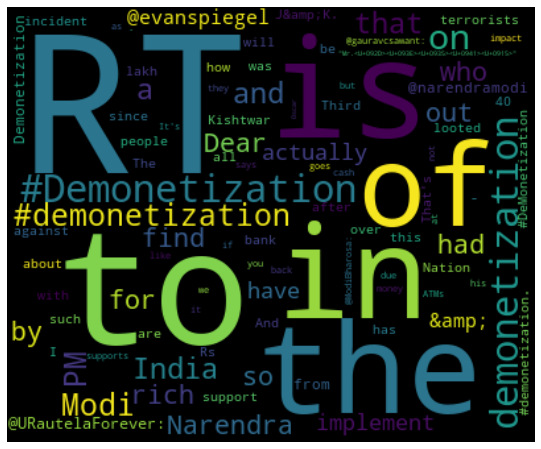

In [33]:
word_freq = gen_freq(dataset.text.str)

wc = WordCloud(width=400, height=330, max_words=100).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#text cleaning

def clean_text(text):
    text = re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[?!.;:,#@-]', '', text)
    text = text.lower()
    return text


In [37]:
#remove stop words
from wordcloud import STOPWORDS
print(STOPWORDS)

{'therefore', "wouldn't", 'yourself', 'all', 'shall', 'same', 'the', 'an', "how's", 'below', 'to', 'each', 'with', 'she', 'k', "they've", 'once', 'a', 'between', 'then', 'theirs', 'do', 'not', "he'd", 'this', 'through', 'any', 'does', 'very', 'get', 'of', 'they', 'ourselves', 'when', 'you', 'further', 'been', 'your', 'him', 'her', 'before', 'myself', "there's", 'otherwise', 'too', 'which', 'on', 'his', 'who', 'most', 'in', 'having', 'after', 'would', 'what', 'r', "shouldn't", "i'd", 'since', 'yourselves', 'or', 'com', "mustn't", 'off', 'were', "we're", "shan't", "you've", 'than', 'as', 'ought', 'those', "weren't", "what's", "don't", "doesn't", 'himself', 'few', "he'll", 'me', "she'll", "you'd", 'over', 'where', 'at', 'ever', 'no', 'was', "they'd", 'because', "we've", 'here', 'herself', 'had', "that's", "let's", 'just', 'until', "he's", "i'm", 'how', 'while', 'am', 'that', "can't", "why's", "it's", 'their', 'down', 'did', 'is', "they're", 'has', 'and', "where's", 'also', 'both', "hadn't

In [38]:
text = dataset.text.apply(lambda x:clean_text(x))


In [39]:
text

0         rssurjewala critical question was paytm infor...
1         hemant_80 did you vote on demonetization on m...
2         roshankar former finsec rbi dy governor cbdt ...
3         ani_news gurugram (haryana) post office emplo...
4         satishacharya reddy wedding mail_today cartoo...
                               ...                        
14935     saxenavishakha ghost of demonetization return...
14936    n d modi fansd true nationalists of the countr...
14937     bharat_builder lol demonetization has fixed a...
14938     stupidosaur vidyut b team of bjp cia baby cct...
14939    vidyut b team of bjp cia baby cctv evm but wit...
Name: text, Length: 14940, dtype: object

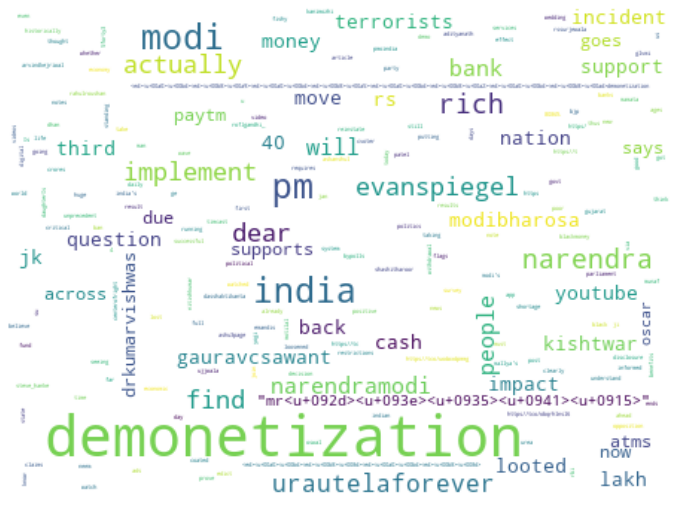

In [41]:
word_freq = gen_freq(text.str)*100

word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# NLP Techniques

In [44]:
pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=dd236d0b8fbf48b6c449a91c59dfe4076ff9d601c46d3c4cd3db1d6f7663144d
  Stored in directory: c:\users\neelam\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'c:\Users\Neelam\Desktop\Desktop\Python\Video\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neelam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [48]:
# tokenization

from nltk.tokenize import sent_tokenize, word_tokenize
text = "Hi John, how are you? I'll be travelling to your city. Lets catch up"

#sentence tokenization
sent_tokenize(text)

['Hi John, how are you?', "I'll be travelling to your city.", 'Lets catch up']

In [49]:
#word tokenization
word_tokenize(text)

['Hi',
 'John',
 ',',
 'how',
 'are',
 'you',
 '?',
 'I',
 "'ll",
 'be',
 'travelling',
 'to',
 'your',
 'city',
 '.',
 'Lets',
 'catch',
 'up']

In [54]:
## stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem("laughing"))
print(stemmer.stem("increasing")) #donot give too good answer

laugh
increas


In [58]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neelam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [64]:
# Lemmatization

from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

print(lemm.lemmatize("increases"))
print(lemm.lemmatize("laughing", pos='v'))

increase
laugh


In [68]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Neelam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [69]:
from nltk import pos_tag
text = "Hi John, how are you? I'll be travelling to your city. Lets catch up"

tokens = word_tokenize(text)
pos_tag(tokens)

[('Hi', 'NNP'),
 ('John', 'NNP'),
 (',', ','),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('?', '.'),
 ('I', 'PRP'),
 ("'ll", 'MD'),
 ('be', 'VB'),
 ('travelling', 'VBG'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('city', 'NN'),
 ('.', '.'),
 ('Lets', 'NNS'),
 ('catch', 'VBP'),
 ('up', 'RP')]

In [72]:
from nltk import ngrams
sentence = "I love to play games"

n=2

for grams in ngrams(word_tokenize(sentence), n):
    print(grams)


('I', 'love')
('love', 'to')
('to', 'play')
('play', 'games')
